# Construct Quantum Circuits with Paddle Quantum's ansatz

_Copyright (c) 2023 Institute for Quantum Computing, Baidu Inc. All Rights Reserved._

`ansatz`, which builds on top of Paddle Quantum, is designed to be a toolkit for implementing various quantum circuits. It provides high level APIs for researchers who are interested in implementing quantum algorithm with quantum circuits. At the same time, `ansatz` also provides a convenient way for developers to extend the functionality. `ansatz` is currently under active development, feel free to join us by opening issues or pull requests.

## Construct the quantum circuits

Paddle Quantum provides the following three ways to build quantum circuits:

- **Direct construction of quantum circuits using quantum gates.** Quantum circuit can be expressed as a combination of single-qubit quantum gates and two-qubit gates. Paddle Quantum provides a variety of quantum gates including $R_y, R_x, R_z$ single-qubit gate, two-qubit CNOT gate, etc. Specific details can see [API of Paddle Quantum](https://qml.baidu.com/api/paddle_quantum.ansatz.circuit.html). Using these quantum gates we can directly to create quantum circuits.

- **Use oracle to construct quantum circuits.** In addition to constructing quantum circuits using quantum gates provided by Paddle Quantum, we can also construct quantum circuits using the oracle of a unitary, then implement it in the circuit. 

- **Use built-in circuit templates to construct quantum circuits.** Paddle Quantum provides some built-in circuit templates to make user's life easier. For more templates, see [API of Paddle Quantum](https://qml.baidu.com/api/paddle_quantum.ansatz.circuit.html).

Let's start from a specific example to understand the way to construct a quantum circuit in Paddle Quantum. First we import the necessary packages.

In [1]:
import numpy as np
import scipy
import paddle
from paddle_quantum.gate import RY, RX, RZ
from paddle_quantum.ansatz import Circuit
from paddle_quantum.state import ghz_state
import warnings
warnings.filterwarnings("ignore")

d:\programs\Anaconda\envs\pq\lib\site-packages\openfermion\hamiltonians\hartree_fock.py:11: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  from scipy.optimize.optimize import OptimizeResult
d:\programs\Anaconda\envs\pq\lib\site-packages\paddle\tensor\creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
d:\programs\Anaconda\envs\pq\lib\site-packages\paddle\tensor\creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more detail

### Directly construction of quantum circuits using quantum gates.

The following code demonstrates the construction of a single-qubit quantum circuit to generate $\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$.

In [2]:
# Create a single qubit circuit
cir = Circuit(1)

# Set the Hadamard gate
cir.h(0)

# Output quantum circuit
output_state = cir()
print(output_state.ket)

Tensor(shape=[2, 1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(0.7071067690849304+0j)],
        [(0.7071067690849304+0j)]])


### Use oracle to construct quantum circuits

We use the oracle of $e^{-i\frac{\phi}{2}Z}$ to evolve the input state $\ket{\psi}=\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$. Then the output state is $e^{-i\frac{\phi}{2}Z}\ket{\psi}$, where $Z$ is Pauli $Z$.

In [3]:
def oracle_cir(num_qubits: int, phi: float) -> Circuit:
    r""" Use oracle to construct quantum circuits
    
    Args:
        num_qubits: the number of qubits
        phi: unknown parameter

    Returns:
        Circuit
        
    """    
    # Create the unitary
    z = np.array([[1, 0],
                  [0, -1]])
    oracle_unitary = paddle.to_tensor(scipy.linalg.expm(-1j * z * phi / 2))
    # Create a quantum circuit
    cir_oracle = Circuit(num_qubits)
    # Implement the oracle into the circuit 
    cir_oracle.oracle(oracle_unitary, 0) 

    return cir_oracle

In [4]:
# Set parameters
PHI = np.pi / 7
NUM_QUBITS = 1
PSI = ghz_state(1)
CIR = oracle_cir(NUM_QUBITS, PHI)
# Output state
print('The output state is \n', CIR(PSI).ket)

The output state is 
 Tensor(shape=[2, 1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(0.6893781423568726-0.15734605491161346j)],
        [(0.6893781423568726+0.15734605491161346j)]])


### Use built-in circuit templates to construct quantum circuits

Here we demonstrate how to build a quantum circuit using built-in circuit templates. We choose the `complex_entangled_layer`. For other templates, see [API of Paddle Quantum](https://qml.baidu.com/api/paddle_quantum.ansatz.circuit.html).

In [5]:
N = 3  # The number of qubits
D = 1  # The depth of the template

# Initialize the quantum circuit
cir_ent_layer = Circuit(N) 
# Construct complex_entangled_layer
cir_ent_layer.complex_entangled_layer(depth=D)
# Print circuit
print(cir_ent_layer)

--U----*---------x--
       |         |  
--U----x----*----|--
            |    |  
--U---------x----*--
                    


## Specific circuit construction

### Visualize circuit

In the previous section, we print the built-in template. Now we describe in detail how to visualize the circuit in Paddle Quantum. Two circuit output modes are provided: `print(your_cir)` and `your_cir.plot()`. The first method is represented by lines and symbols, which is simple in form and easy to show complex circuits. The second one is to use a box to represent the quantum gate, the form is more intuitive than the first one. We take a circuit generating the GHZ state as an example in the following to show two circuit output modes.

In [6]:
def gen_ghz_cir(num_qubits: int) -> Circuit:
    r""" Quantum circuit to generate GHZ state
    
    Args:
        num_qubits: the number of qubits

    Returns:
        Circuit
        
    """ 
    # Create a quantum circuit
    ghz_cir = Circuit(num_qubits)
    # Add the Hadamard gate to the first qubit
    ghz_cir.h(0)
    # Add CNOT gates
    for i in range(1, num_qubits):
        ghz_cir.cnot([0, i])

    return ghz_cir

Using the constructed circuit to generate $3$-qubit GHZ state $\frac{1}{\sqrt{2}}(\ket{000}+\ket{111})$.

In [7]:
# Use the function that generates the GHZ state
ghz_3_cir = gen_ghz_cir(3)
# Output quantum state
ghz_3_state = ghz_3_cir()
print('The output state is\n', ghz_3_state.ket)

The output state is
 Tensor(shape=[8, 1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(0.7071067690849304+0j)],
        [0j                     ],
        [0j                     ],
        [0j                     ],
        [0j                     ],
        [0j                     ],
        [0j                     ],
        [(0.7071067690849304+0j)]])


Two ways to visualize quantum circuits:

First way to show the circuit:

--H----*----*--
       |    |  
-------x----|--
            |  
------------x--
               
Second way to show the circuit: 



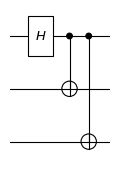

In [8]:
# Print circuits
print('First way to show the circuit:')
print()
print(ghz_3_cir)
print('Second way to show the circuit: \n')
ghz_3_cir.plot()

### General construction of quantum gates

Next, we take $R_y, R_x, R_z$ and CNOT gates as an example to show a general construction of how to add or remove gates.

The quantum circuit after adding gates is: 


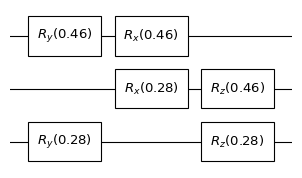

The quantum circuit after removing gates is:


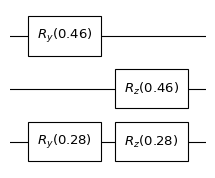

In [9]:
# Initialize a 3-qubit quantum circuit
cir = Circuit(3)
# Set parameters and customize quantum gates. Here we select Ry, Rx, Rz gates
param = np.random.rand(2)
ry_gate = RY(param=param, qubits_idx=[0, 2])  # By default, Ry randomly generates a set of parameters
rx_gate = RX(param=param, qubits_idx=[0, 1])
rz_gate = RZ(param=param, qubits_idx=[1, 2])
# Add quantum gates
cir.append(ry_gate)
cir.append(rx_gate)
cir.insert(index=2, operator=rz_gate)  # index specifies where to insert, and operator specifies which quantum gate to insert
# Print quantum gate
print('The quantum circuit after adding gates is: ')
cir.plot()

# Remove Rx gate
cir.pop(index=1, operator=rx_gate)  # index specifies where to remove, and operator specifies which quantum gate to remove
print('The quantum circuit after removing gates is:')
cir.plot()

In addition to inserting a quantum gate using methods such as `append`, it can also be realized in the following ways:

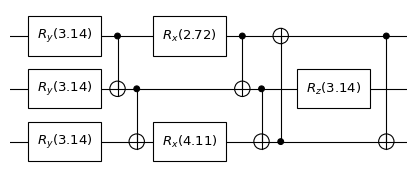

In [10]:
# Initialize a 3-qubit quantum circuit
cir = Circuit(3)
# Set parameters
theta = np.full([2], np.pi)
# Add quantum gates
# Add single-qubit gate Ry 
cir.ry(qubits_idx='full', param=theta[0])  # qubits_idx='full': specifies that all qubits are applied, defaults qubits_idx of the single-qubit gate to 'cycle'. param: parameters of the gates, defaults to None, i.e., randomly generated by Ry gate.
# Add two-qubit gate CNOT
cir.cnot(qubits_idx='linear')  # qubits_idx='linear': specifies that the implement of the CNOT gate is linear, default qubits_idx of the multi-qubit quantum gate is cycle.
# Add single qubit gate Rx 
cir.rx(qubits_idx='even')  # qubits_idx='even': specifies that even number of qubits are applied, defaults of single-qubit gate to 'cycle'. param: parameters of the gates, defaults to None, i.e., randomly generated by Rx gate.
# Add two-qubit gate CNOT
cir.cnot(qubits_idx='cycle')  # qubits_idx='cycle': specifies that the implement of the CNOT gate is cycle, default qubits_idx of the multi-qubit quantum gate is cycle.
# Add single qubit gate Rz
cir.rz(qubits_idx='odd', param=theta[1])  # qubits_idx='odd': specifies that odd number of qubits are applied, defaults of single-qubit gate to 'cycle'. param: parameters of the gates, defaults to None, i.e., randomly generated by Rz gate.
# Add two-qubit gate CNOT
cir.cnot([0, 2])  # qubits_idx is [0, 2] that specifies the CNOT acting on qubits numbered 0 and 2, where 0 is the control qubit and 2 is the target qubit.
# Print circuit
cir.plot()

The quantum circuit construction mentioned above requires a given circuit size, that is, qubit number. In addition to this way, Paddle Quantum also provides a dynamic circuit construction method that does not require input qubit number. The following is a simple example to demonstrate this method.

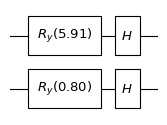

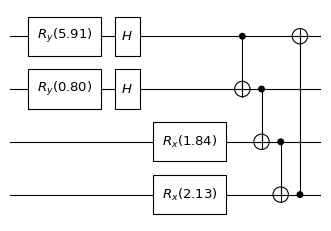

In [11]:
cir = Circuit()  # Do not give a qubit number
cir.ry([0, 1])  # The size of this circuit is updated to 2
cir.h()  # Set Hadamard gates
cir.plot()  # Draw this 2-qubit circuit
cir.rx([2, 3])  # The size of this circuit is updated to 4 because of the added Rx gates
cir.cnot()  # Set CNOT gates
cir.plot()  # Draw the updated 4-qubit circuit